


Sample BrainTumor dataset head(5) :- 

          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  f

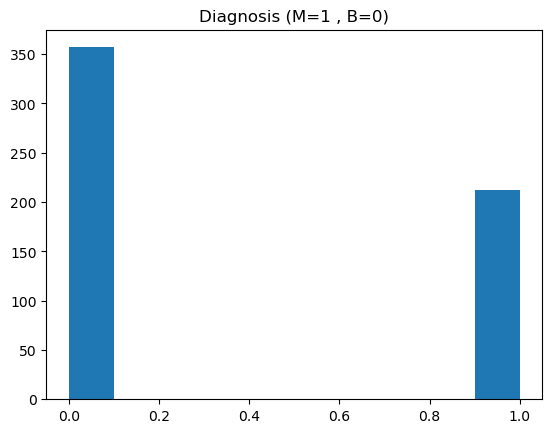




After id feature is set as row index: 
           diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                          
842302            1        17.99         10.38          122.80     1001.0   
842517            1        20.57         17.77          132.90     1326.0   
84300903          1        19.69         21.25          130.00     1203.0   
84348301          1        11.42         20.38           77.58      386.1   
84358402          1        20.29         14.34          135.10     1297.0   
...             ...          ...           ...             ...        ...   
926424            1        21.56         22.39          142.00     1479.0   
926682            1        20.13         28.25          131.20     1261.0   
926954            1        16.60         28.08          108.30      858.1   
927241            1        20.60         29.33          140.10     1265.0   
92751             0         7.76 

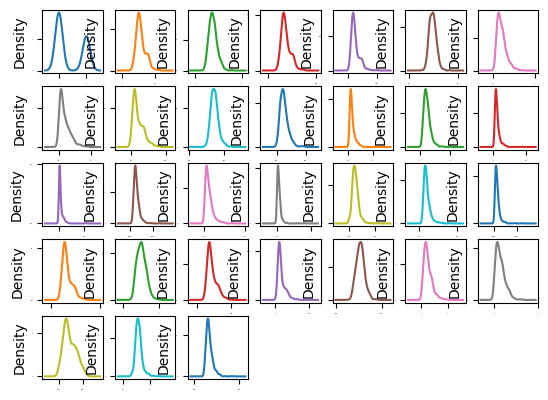

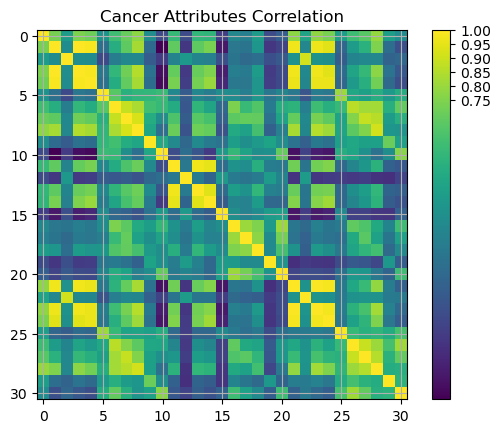

CART   :   0.921323 (0.033083) (run time: 0.128457)
SVM    :   0.921323 (0.046931) (run time: 0.062484)
NB     :   0.939474 (0.044113) (run time: 0.031242)
KNN    :   0.921188 (0.040857) (run time: 2.011822)


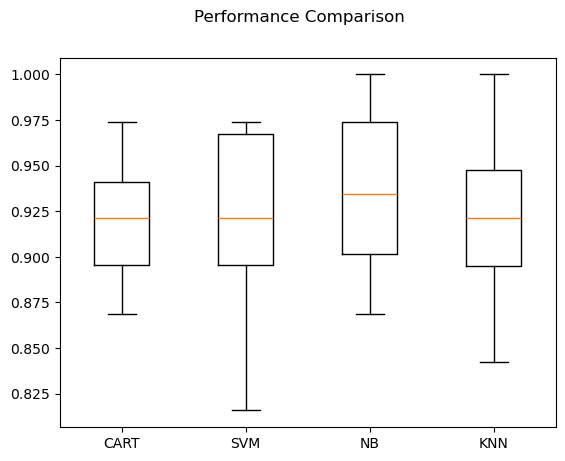




Accuracies of algorithm after scaled dataset

ScaledCART: 0.913495 (0.042170) (run time: 0.128501)
ScaledSVM: 0.973684 (0.026316) (run time: 0.078146)
ScaledNB: 0.928947 (0.044113) (run time: 0.056918)
ScaledKNN: 0.955331 (0.033429) (run time: 1.800060)


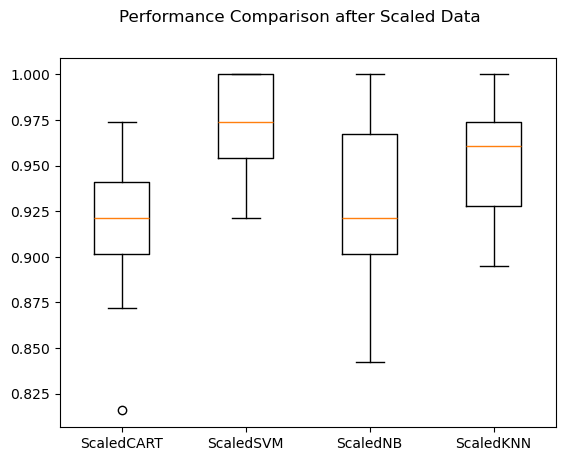



SVM Training Completed.It's Run Time: 0.009564
All predictions done successfully by SVM Machine Learning Algorithms


Accuracy score 0.962766



confusion_matrix =

[[116   2]
 [  5  65]]
Model dumped successfully into a file by Joblib


In [1]:
#MLProject(Guided): Brain Tumor Cancer Prediction
#-----------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
import time

import warnings
warnings.filterwarnings(action="ignore")
#pd.set_option('display.width', 1000000)
pd.set_option('display.max_columns', None)




#Exploratory data analysis(EDA)
#Load the dataset and do some quick exploratory data analysis.

data = pd.read_csv('C:\\Users\\ARUNAVA\\Desktop\\ML files\\BrainTumorData.csv', index_col=False)
print("\n\n\nSample BrainTumor dataset head(5) :- \n\n", data.head(5) )


print("\n\n\nShape of the BrainTumor dataset  data.shape = ", end="")
print( data.shape)
#(569, 33)


print("\n\n\nBrainTumor data decription : \n")
print( data.describe() )



#Data visualisation and pre-processing


#First thing to do is to enumerate the diagnosis column such that M = 1, B = 0.
#  Then, I set the ID column to be the index of the dataframe.
# Afterall, the ID column will not be used for machine learning


print( "\n\n\ndata.diagnosis.unique() : " , data.diagnosis.unique() )


#Replace M = 1   and B = 0
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

#data['diagnosis'] = data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
print("\n\n\nAfter updation of  diagnosis feature: \n", data.head() )


plt.hist(data['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()


data = data.set_index('id')
print("\n\n\nAfter id feature is set as row index: \n", data)


del data['Unnamed: 32']
print("\n\nAfter Deletion of 'Unnamed: 32' column\n", data)


#Let's take a look at the number of Benign and Malignant cases from the dataset.
# From the output shown below, majority of the cases are benign (0).

print("\n\n\ndata.groupby('diagnosis').size()\n")
print(data.groupby('diagnosis').size())

#diagnosis
#0    357
#1    212
#dtype: int64


#Next, we visualise the data using density plots to get a sense of the data distribution.
# From the outputs below, you can see the data shows a general gaussian distribution.
data.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=False, fontsize=1)
plt.show()


from matplotlib import cm as cm
fig = plt.figure()
ax1 = fig.add_subplot(111)
#cmap = cm.get_cmap('jet', 30)
#cax = ax1.imshow(data.corr(), interpolation="none", cmap=cmap)
cax = ax1.imshow(data.corr(), interpolation="none")
ax1.grid(True)
plt.title('Cancer Attributes Correlation')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()




#Finally, we'll split the data into predictor variables and target variable,
# following by breaking them into train and test sets. We will use 33% of the data as test set.

Y = data['diagnosis'].values
X = data.drop('diagnosis', axis=1).values


X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.33, random_state=21)
#  1       2       3       4


#Baseline algorithm checking
#From the dataset, we will analysis and build a model to predict if a given set of
# symptoms lead to a cancerous BrainTumor.
# This is a binary classification problem, and a few algorithms are appropriate for use.
# Since we do not know which one will perform the best at the point,
# we will do a quick test on the few algorithms to get an early indication of how each of them perform.
# We will use K-Fold cross validation for each testing.

#The following  algorithms will be used,

#1) Classification and Regression Trees (CART),
#2) Support Vector Machines (SVM),
#3) Gaussian Naive Bayes (NB)
#4) k-Nearest Neighbors (KNN).




models_list = []
models_list.append(('CART', DecisionTreeClassifier()))
models_list.append(('SVM', SVC()))
models_list.append(('NB', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))


num_folds = 10

results = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=123)
    start_Time = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    end_Time = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%-7s: %10f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end_Time-start_Time))



#CART: 0.912029 (0.039630) (run time: 0.138211)
#SVM: 0.619614 (0.082882) (run time: 0.164310)
#NB: 0.940773 (0.033921) (run time: 0.019228)
#KNN: 0.927729 (0.055250) (run time: 0.027202)




#Performance Comparision
#------------------------------
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


#From the initial run, it looks like GaussianNB, KNN and CART performed the best
# given the dataset (all above 92% mean accuracy).
# Support Vector Machine has a surprisingly bad performance here.
# However, if we standardise the input dataset, it's performance should improve.





#Evaluation of algorithm on Standardised Data
#The performance of the machine learning algorithm could be improved if a
# standardised dataset is being used.

# The improvement is likely for all the models.

# I will use pipelines that standardize the data and build the model for each
#  fold in the cross-validation test harness.

# That way we can get a fair estimation of how each model with standardized data might perform on unseen data.






# Standardize the dataset
pipelines = []

pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC( ))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))

results = []
names = []

print("\n\n\nAccuracies of algorithm after scaled dataset\n")

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=123)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))


#ScaledCART: 0.920966 (0.038259) (run time: 0.098808)
#ScaledSVM: 0.964879 (0.038621) (run time: 0.073377)
#ScaledNB: 0.931932 (0.038625) (run time: 0.027154)
#ScaledKNN: 0.958357 (0.038595) (run time: 0.040088)

#Notice the drastic improvement of SVM after using scaled data.


#Performance Comparison after Scaled Data
#----------------------------------------

fig = plt.figure()
fig.suptitle('Performance Comparison after Scaled Data')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#Application of SVC on dataset
#Let's fit the SVM to the dataset and see how it performs given the test data.

#prepare the model
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler().fit(X_train)
X_train_scaled=scalar.fit_transform(X_train)

model=SVC()
start =time.time()
model.fit(X_train_scaled,Y_train) #Trainng of algorithm using 67% of data
end=time.time()
print("\n\nSVM Training Completed.It's Run Time: %f" %(end-start))

X_test_scaled=scalar.transform(X_test)
predictions=model.predict(X_test_scaled)
print("All predictions done successfully by SVM Machine Learning Algorithms")
print("\n\nAccuracy score %f"  % accuracy_score(Y_test,predictions))

print("\n\n")
print("confusion_matrix =\n")
print(confusion_matrix(Y_test,predictions))

import joblib
filename="finalized_BrainTumor_model.sav"
joblib.dump(model,filename)
print("Model dumped successfully into a file by Joblib")